<h1>Question1</h1>

(array([1259., 2643., 2674., 1908.,  929.,  394.,  144.,   30.,   13.,
           6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

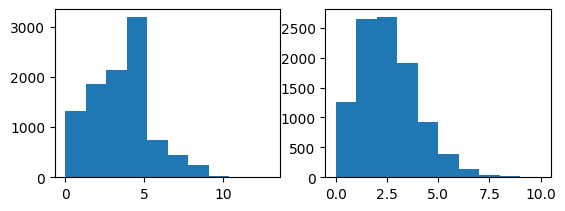

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
data=np.loadtxt('Tarbiat.csv',dtype=np.ushort,skiprows=1,delimiter=',')
metro=data[:,0]
metro_mean=metro.mean()
metro_max=metro.max()
brt=data[:,1]
brt_mean=brt.mean()
brt_max=brt.max()
plt.subplot(2, 2, 1)
plt.hist(metro)
plt.subplot(2, 2, 2)
plt.hist(brt)

The random variables are indicating the number of times something occurs in a certain time period so we can guess that the random variables are for a poisson distribution.After plotting the diagrams we can say that our guess was correct and the poisson pmf matches the histogram.We know that the poisson distribution only has one parameter which is equal to its mean so we can find lambda by taking mean of the data.

3.5316
2.0636


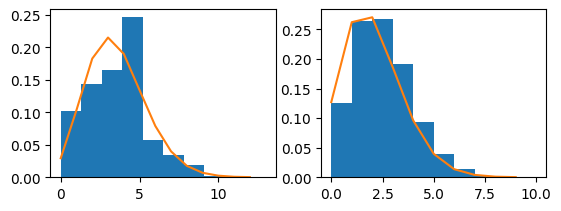

In [32]:
print(metro_mean)
print(brt_mean)
plt.subplot(2, 2, 1)
plt.hist(metro, density=True)
xpoints = np.arange(metro_max)
ypoints = stats.poisson.pmf(xpoints, metro_mean)
plt.plot(xpoints,ypoints)
plt.subplot(2, 2, 2)
plt.hist(brt, density=True)
xpoints = np.arange(brt_max)
ypoints = stats.poisson.pmf(xpoints, brt_mean)
plt.plot(xpoints,ypoints)

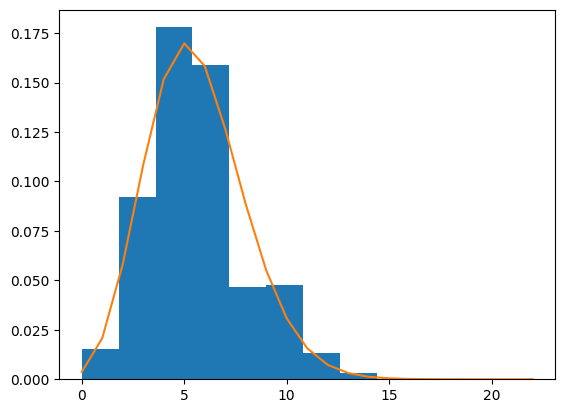

In [33]:
plt.hist(metro+brt, density=True)
xpoints = np.arange(metro_max+brt_max)
ypoints = stats.poisson.pmf(xpoints, brt_mean+metro_mean)
plt.plot(xpoints, ypoints)

$P(X=K|X + Y = n)=\frac{P(X=k,Y=n-k)}{P(X+Y=n)}=\frac{P(X=k)P(Y=n-k)}{P(X+Y=n)}=\frac{\frac{e^{-\lambda_{1}}\lambda_{1}^{k}}{k!}\times\frac{e^{-\lambda_{2}}\lambda_{2}^{(n-k)}}{(n-k)!}}{\frac{e^{-(\lambda_{1}+\lambda_{2})}(\lambda_{1}+\lambda_{2})^{n}}{n!}}=\frac{n!}{k!(n-k)!}\times\frac{\lambda_{1}^{k}\lambda_{2}^{n-k}}{(\lambda_{1}+\lambda_{2})^{n}}={n\choose k}\left( \frac{\lambda_{1}}{\lambda_{1}+\lambda_{2}} \right)^{k}\left( \frac{\lambda_{2}}{\lambda_{1}+\lambda_{2}} \right)^{n-k}\Rightarrow (X|X+Y=n)\sim Bin(n,\frac{\lambda_{1}}{\lambda_{1}+\lambda_{2}})$
$\Rightarrow (X|X+Y=n)\sim Bin(8,\frac{metro\,mean}{metro\,mean+brt\,mean})$

0.6311838718901915

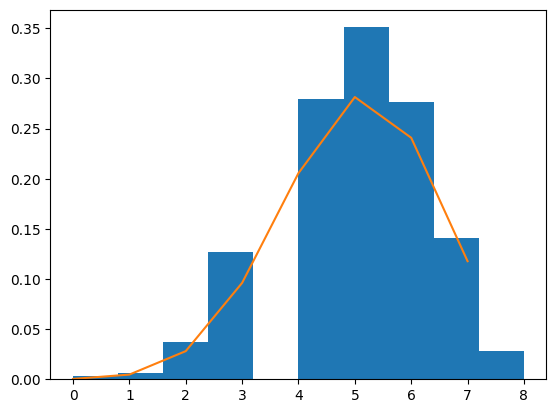

In [34]:
n=8
ypoints = [metro[i] for i in range(len(metro)) if metro[i]+brt[i] == n]
plt.hist(ypoints, density=True)
xpoints = np.arange(n)
ypoints = stats.binom.pmf(xpoints,n,metro_mean/(metro_mean+brt_mean))
plt.plot(xpoints, ypoints)
metro_mean/(metro_mean+brt_mean)

We can see that the calculated distribution matches the plot.

<h1>Question2</h1>

In [35]:
import random
def coupon_collector_simulator(n, k):
    result=0
    for i in range(k):
        coupons=[0]*n
        number_of_coupons_seen=0
        cnt=0
        while(number_of_coupons_seen!=n):
            cnt+=1
            coupon=random.randint(0,n-1)
            if(not coupons[coupon]):
                coupons[coupon]=1
                number_of_coupons_seen+=1
        result+=cnt
    return result/k

n=10
print(coupon_collector_simulator(n,10))
print(coupon_collector_simulator(n,100))
print(coupon_collector_simulator(n,1000))

26.7
29.56
29.048


The answer should converge to $n\times \sum_{i=1}^{10}\frac{1}{i}\simeq 29.29$

$X_{i}$ is a random variable of the gerometric distribution because it represents the number of experiments until a success occurs.\
No because we've already observed i-1 coupons the probability of observing a new coupon is:$p_{i}=\frac{n-(i-1)}{n}$\
$\phi_{X_{i}}(s)=\sum_{k=1}^{\infty}(1-p)^{k-1}pe^{ks}=\sum_{m=0}^{\infty}((1-p)e^s)^m=\frac{pe^s}{1-(1-p)e^s}$

In [36]:
import sympy as sp
s=sp.Symbol('s')
ii=sp.Symbol('ii')
n=10
p=(n-ii+1)/(n)
MGF=((p*sp.exp(s))/(1-(1-p)*sp.exp(s)))
MGFs=[0]*n
for i in range(1,n+1):
    MGFs[i-1] = MGF.subs({ii: i})
MGFs

[exp(s),
 9*exp(s)/(10*(1 - exp(s)/10)),
 4*exp(s)/(5*(1 - exp(s)/5)),
 7*exp(s)/(10*(1 - 3*exp(s)/10)),
 3*exp(s)/(5*(1 - 2*exp(s)/5)),
 exp(s)/(2*(1 - exp(s)/2)),
 2*exp(s)/(5*(1 - 3*exp(s)/5)),
 3*exp(s)/(10*(1 - 7*exp(s)/10)),
 exp(s)/(5*(1 - 4*exp(s)/5)),
 exp(s)/(10*(1 - 9*exp(s)/10))]

$\phi_{X}(s)=\prod_{i=1}^{n}\phi_{X_i}$

In [37]:
MGFX=1
for i in range(n):
    MGFX*=MGFs[i]
print(MGFX)

567*exp(10*s)/(1562500*(1 - 9*exp(s)/10)*(1 - 4*exp(s)/5)*(1 - 7*exp(s)/10)*(1 - 3*exp(s)/5)*(1 - exp(s)/2)*(1 - 2*exp(s)/5)*(1 - 3*exp(s)/10)*(1 - exp(s)/5)*(1 - exp(s)/10))


$E\left( X^n \right)=\Phi^{(n)}(0) \Rightarrow E\left( X \right)=\Phi^{(1)}(0)$

In [38]:
deriv=sp.diff(MGFX,s)
print(deriv.subs({s: 0}).evalf())

29.2896825396825


<h1>Question3</h1>

Text(0.5, 1.0, 'nine')

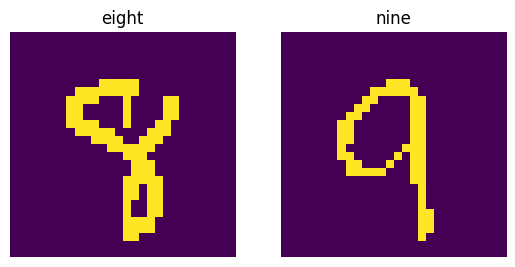

In [39]:
import matplotlib.pyplot as plt
import numpy as np
df = np.loadtxt('digits.csv',dtype=np.ushort,skiprows=1,delimiter=',')
df[:,1:]=df[:,1:]>127
test_data_8=df[20,1:].reshape(28,28).copy()
test_data_9=df[187,1:].reshape(28,28).copy()
df.shape[0]
plt.subplot(1, 2, 1)
plt.imshow(test_data_8[:].reshape(28, 28))
plt.axis('off')
plt.title('eight')
plt.subplot(1, 2, 2)
plt.imshow(test_data_9[:].reshape(28, 28))
plt.axis('off')
plt.title('nine')

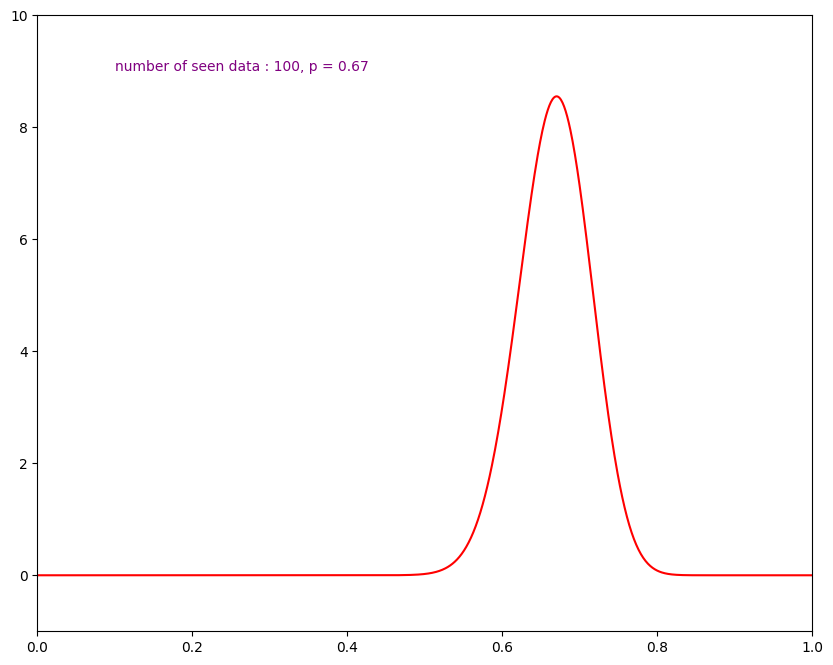

<Figure size 1000x800 with 0 Axes>

In [40]:
# you need these imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from time import sleep
from IPython import display

t = 1000
p = np.linspace(0, 1, t)
fy = stats.beta.pdf(p, a=1, b=1)

def update(fy: np.array, n: bool) -> np.array:
    p = np.linspace(0, 1, t)
    pny=stats.bernoulli.pmf(n,p)
    integral =np.sum(fy*pny)/t
    post = fy*pny/integral
    return post

df201=df[-2,:].copy()
df202 = df[-1, :].copy()
df=df[:-2,:]
plt.figure(figsize=(10, 8))
for i in range(df.shape[0]//2):
    n = df[i,405]
    fy = update(fy, n)

    plt.plot(p, fy, 'r', label='1')
    plt.ylim(-1, 10)
    plt.xlim(0, 1)
    plt.text(
        0.1, 9, f'number of seen data : {i + 1}, p = {fy.argmax() / t :.2f}', color='purple')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    sleep(0.05)

The reported number would be the value of p for which $f\left( Y|N \right)$ becomes maximum and based on the result of the code it is 0.67 and we can see in the next cell that indeed the mean of this pixel is about 0.67 .

0.67


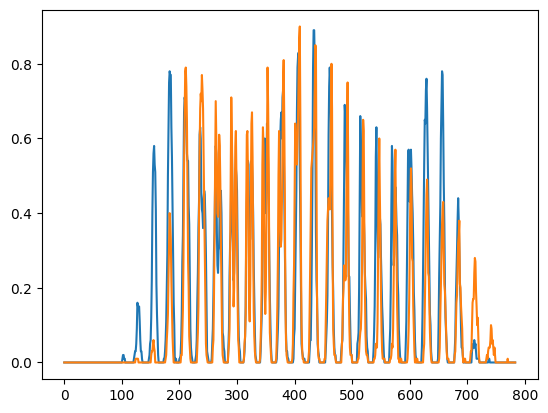

In [41]:
p8 = df[:df.shape[0]//2, 1:].mean(axis=0).copy()
p9 = df[df.shape[0]//2:, 1:].mean(axis=0).copy()
print(p8[404])
plt.plot(p8)
plt.plot(p9)

I thought it would be a cool idea to make an image generator like midjourney or DALL-E. But unfortunately due to few number of samples the result isn't pretty.

Text(0.5, 1.0, 'nine')

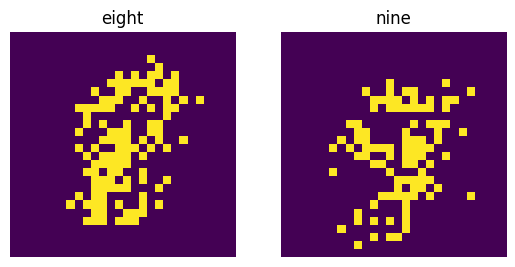

In [50]:
test_data_8 = np.array(p8.copy())
test_data_9 = np.array(p9.copy())
for i in range(len(test_data_8)):
    test_data_8[i] = np.random.rand() <= p8[i]
for i in range(len(test_data_9)):
    test_data_9[i] = np.random.rand() <= p9[i]
plt.subplot(1, 2, 1)
plt.imshow(test_data_8[:].reshape(28, 28))
plt.axis('off')
plt.title('eight')
plt.subplot(1, 2, 2)
plt.imshow(test_data_9[:].reshape(28, 28))
plt.axis('off')
plt.title('nine')

We can see that our model has predicted the labels correctly and with high accuracy.

In [43]:
np8=np.maximum(p8,np.full(p8.shape,1/p8.size))
np9=np.maximum(p9,np.full(p9.shape,1/p9.size))
p_8=1
for i in range(df.shape[1]-1):
    if(df201[i+1]):
        p_8*=np8[i]
    else:
        p_8*=(1-np8[i])
p_9=1
for i in range(df.shape[1]-1):
    if(df201[i+1]):
        p_9*=np9[i]
    else:
        p_9*=(1-np9[i])
p89_201 = [p_8/(p_8+p_9),p_9/(p_8+p_9)]
p_8=1
for i in range(df.shape[1]-1):
    if(df202[i+1]):
        p_8*=np8[i]
    else:
        p_8*=(1-np8[i])
p_9=1
for i in range(df.shape[1]-1):
    if(df202[i+1]):
        p_9*=np9[i]
    else:
        p_9*=(1-np9[i])
p89_202 = [p_8/(p_8+p_9),p_9/(p_8+p_9)]
print(p89_201)
print(df201[0])
print(p89_202)
print(df202[0])

[0.9997519737189606, 0.00024802628103940425]
8
[6.18534363967466e-19, 1.0]
9


Here I've used the images generated previously and the model predicted their labels correctly.

In [44]:
im=test_data_8
p_8 = 1
for i in range(df.shape[1]-1):
    if (im[i]):
        p_8 *= np8[i]
    else:
        p_8 *= (1-np8[i])
p_9 = 1
for i in range(df.shape[1]-1):
    if (im[i]):
        p_9 *= np9[i]
    else:
        p_9 *= (1-np9[i])
pim_8 = [p_8/(p_8+p_9), p_9/(p_8+p_9)]
print(pim_8)
im=test_data_9
p_8 = 1
for i in range(df.shape[1]-1):
    if (im[i]):
        p_8 *= np8[i]
    else:
        p_8 *= (1-np8[i])
p_9 = 1
for i in range(df.shape[1]-1):
    if (im[i]):
        p_9 *= np9[i]
    else:
        p_9 *= (1-np9[i])
pim_9 = [p_8/(p_8+p_9), p_9/(p_8+p_9)]
print(pim_9)

[1.0, 9.962531866406496e-34]
[6.391864097091911e-25, 1.0]


And here the model predicted the label of the images I've hand drawn correctly.

[1.0, 2.3778556878131346e-48]
[1.1187214188005383e-15, 0.9999999999999988]


Text(0.5, 1.0, 'nine')

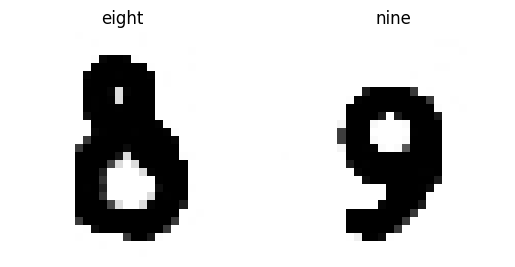

In [45]:
import cv2
im_8 = cv2.imread("eight.jpg")
im8 = im_8.mean(axis=2)
im8[:] = im8[:] <= 127
im8 = im8.flatten()
im8
p_8 = 1
for i in range(df.shape[1]-1):
    if (im8[i]):
        p_8 *= np8[i]
    else:
        p_8 *= (1-np8[i])
p_9 = 1
for i in range(df.shape[1]-1):
    if (im8[i]):
        p_9 *= np9[i]
    else:
        p_9 *= (1-np9[i])
pim8 = [p_8/(p_8+p_9), p_9/(p_8+p_9)]
print(pim8)
im_9 = cv2.imread("nine.jpg")
im9 = im_9.mean(axis=2)
im9[:] = im9[:] <= 127
im9 = im9.flatten()
im9
p_8 = 1
for i in range(df.shape[1]-1):
    if (im9[i]):
        p_8 *= np8[i]
    else:
        p_8 *= (1-np8[i])
p_9 = 1
for i in range(df.shape[1]-1):
    if (im9[i]):
        p_9 *= np9[i]
    else:
        p_9 *= (1-np9[i])
pim9 = [p_8/(p_8+p_9), p_9/(p_8+p_9)]
print(pim9)
plt.subplot(1, 2, 1)
plt.imshow(im_8)
plt.axis('off')
plt.title('eight')
plt.subplot(1, 2, 2)
plt.imshow(im_9)
plt.axis('off')
plt.title('nine')